In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

%load_ext autoreload
%autoreload 2

from cda_prep import *
from cda_util import *
from cda_models import *

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Cyber Data Analytics - Lab 1
Cheatsheet: https://gist.github.com/agalea91/545e2337b94d965be788f7db18b1f497

**Data description**
 - `issuercountrycode`: country where the card was issued
 - `txvariantcode`: the card type that was used (subbrand of visa or master card)
 - `bin`: card issuer identifier
 - `amount`/currencycode: transaction amount in minor units (so 100 EUR = 100 euro cent)
 - `shoppercountrycode`: IP address country
 - `shopperinteraction`: Ecommerce if it was an online transaction, ContAuth if it was a (monthly) subscription
 - `simple_journal`: Payment status. Authorised = “transaction approved and no fraud reported”, Refused = “transaction was declined, can be fraud, but can also be insufficient funds, etc”, Chargeback = “transaction was approved, but turned out to be fraud”
 - `bookingdate`: only relevant for Chargebacks. Time stamp when the chargeback was reported. During simulation you may only use this knowledge after this date. So for example if on an email address a transaction ended in a chargeback, you can only block that email address after the booking date of the chargeback.
 - `cardverificationresponsesupplied`: did the shopper provide his 3 digit CVC/CVV2 code?
 - `cvcresponsecode`: Validation result of the CVC/CVV2 code: 0 = Unknown, 1=Match, 2=No Match, 3-6=Not checked
 - `creationdate`: Date of transaction
 - `accountcode`: merchant’s webshop
 - `mail_id`: Email address
 - `ip_id`: Ip address
 - `card_id`: Card number

**Variables to handle carefully:**

`simple_journal` /
`bookingdate` /
`creationdate`

### 1. Get data

In [3]:
df, df_raw = get_data('data/data_for_student_case.csv')

In [4]:
print("Raw dataset:")
display(df_raw.head(3))

print("Processed dataset:")
display(df.head(3))

Raw dataset:


,issuercountrycode,txvariantcode,bin,amount,currencycode,shoppercountrycode,shopperinteraction,cardverificationcodesupplied,cvcresponsecode,accountcode,mail_id,ip_id,card_id,labels
txid,,,,,,,,,,,,,,
1,MX,mccredit,530056.0,64800.0,MXN,MX,Ecommerce,True,0,MexicoAccount,email68370,ip111778,card184798,1.0
2,MX,mccredit,547046.0,44900.0,MXN,MX,Ecommerce,True,0,MexicoAccount,email101299,ip78749,card151595,1.0
3,MX,mccredit,528843.0,149900.0,MXN,MX,Ecommerce,True,0,MexicoAccount,email278604,ip70594,card242142,1.0


Processed dataset:


,issuercountrycode,txvariantcode,bin,amount,currencycode,shoppercountrycode,shopperinteraction,cardverificationcodesupplied,cvcresponsecode,accountcode,mail_id,ip_id,card_id,labels,amount_dollar
txid,,,,,,,,,,,,,,,
1,76,2,530056.0,64800.0,2,98,1,1,0,1,187702,7386,73358,1.0,3416.092257
2,76,2,547046.0,44900.0,2,98,1,1,0,1,834,194109,44739,1.0,2367.014542
3,76,2,528843.0,149900.0,2,98,1,1,0,1,119287,189655,122802,1.0,7902.349217


### 2. Explore

In [5]:
df_stats = get_class_balance(df)

with pd.option_context('display.float_format', lambda x: "%.3f" % x):
    display(df_stats)

,count,pct
,,
Legitimate,236691,99.854
Fraud,345,0.146
Total,237036,100.000


### 3. Visualize

In [6]:
# Class imbalance

# Time series

# High risk days?

# Monetary value

# Correlation heatmap

# t-SNE for visualization?

### 4. Classify

In [51]:
# Split data and labels
X, y = split_labels(df)

In [56]:
# kNN-2
classifier = KNeighborsClassifier(2)

In [ ]:
# kNN-3
classifier = KNeighborsClassifier(3)

In [59]:
# Cross-validate and report true/false positives/negatives
cross_val(X, y, classifier, 10)

   TP: 343
   FP: 1
   TN: 236690
   FN: 2
Total: 237036


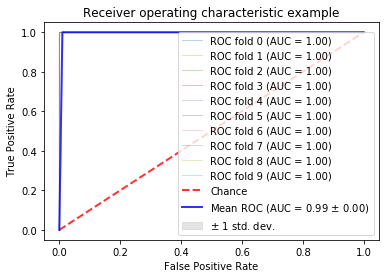

In [61]:
# Cross-validate and draw ROC curve (without data preprocessing)
roc_cross_val(X, y, classifier, 10)